<a href="https://colab.research.google.com/github/RizalAkbarFitrianto/UAS_Visi_Komputer/blob/main/Fitur_Ekstraksi_Tekstur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

befor we start playing the program, we should import the codes we will use mosly like open CV and whtever

In [12]:
#impor library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

and then, we must defines a function for the method which we will execute

In [13]:
#membuat fungsi load_image
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

next function is preprocessing function

In [14]:
#membuat fungsi preprocessing
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

The next function to define is extractLBP(). The purpose of this function is to return 2 values. The first value is the result of texture extraction in the form of an image


In [15]:
#membuat fungsi extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

The last function <i> featureExtraction().</i> This function's purpose is to return a new array containing the extracted textures, along with their vectors.


In [16]:
#membuat fungsi featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

The next step is to load the dataset and store it in an array


In [17]:
#memuat dataset
data=[]
data=load_image(data)

After loading the dataset, then converting the image to greyscale


In [18]:
#merubah gambar ke greyscale
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


The last stage is to get the results of texture extraction


In [19]:
#mendapatkan hasil ekstraksi
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


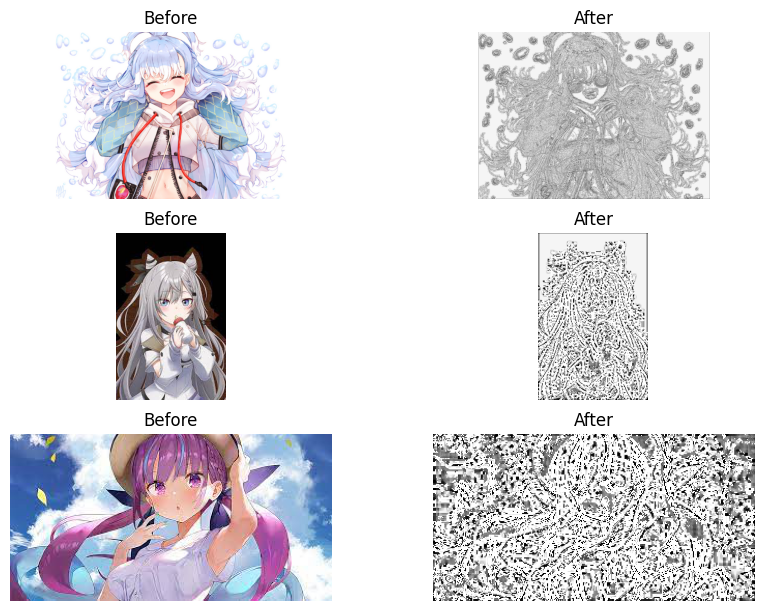

In [20]:
#menampilkan hasi ekstraksi tekstur
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [21]:
#cetak vektor gambar
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.02703712 0.01631128 0.01165713 0.00789523 0.00623586 0.00545377
 0.00472042 0.00614659 0.00744614 0.00991039 0.0143265  0.03382863
 0.061735   0.04030908 0.01697752 0.0191917  0.0109776  0.01771424
 0.01019445 0.01139376 0.01315716 0.01677915 0.02125625 0.01940294
 0.30687276 0.28306933]

Vector of Image 2 : [0.0534177  0.03399849 0.01465863 0.0087079  0.00702186 0.00676399
 0.00523664 0.00670449 0.0065458  0.0076566  0.00938231 0.01313127
 0.02056968 0.02183917 0.00716071 0.01563058 0.00535566 0.01384536
 0.00529615 0.00553418 0.00706153 0.01047328 0.01868529 0.03562502
 0.20446701 0.45523069]

Vector of Image 3 : [0.05269739 0.03193601 0.01986821 0.01431067 0.01282204 0.01095629
 0.01061887 0.01216704 0.01419158 0.01716883 0.02147592 0.02504863
 0.02858164 0.0247509  0.01784367 0.01619626 0.01311976 0.01212735
 0.00994403 0.00827677 0.01049978 0.0114525  0.01631535 0.0314795
 0.0579969  0.4981541 ]
